In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

# Aesthetics
%matplotlib inline
sns.set_theme(style="whitegrid", palette="muted")
warnings.filterwarnings('ignore')


In [239]:
df = pd.read_csv('loan_approval_dataset.csv')

# handle whitespace and drop non-predictive IDs
df.columns = df.columns.str.strip()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

if 'loan_id' in df.columns:
    df.drop(columns=['loan_id'], inplace=True)

df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

print(f"Data ready. Shape: {df.shape}")

df.head()

Data ready. Shape: (4269, 12)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [240]:
df.shape

(4269, 12)

In [241]:
df[df.duplicated()].count()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 400.3+ KB


In [243]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [244]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0
loan_status,4269.0,6.221598e-01,4.849042e-01,0.0,0.0,1.0,1.0,1.0


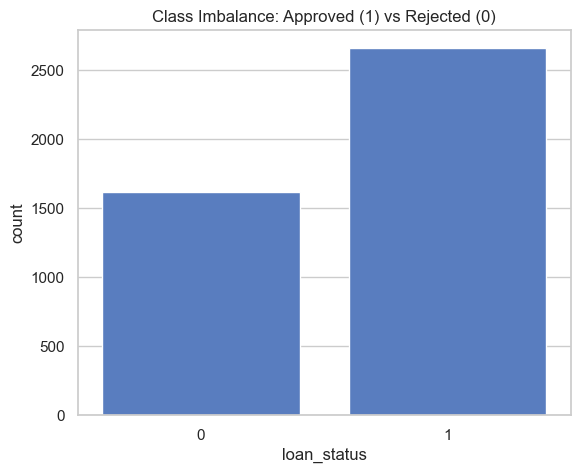

In [245]:
plt.figure(figsize=(14, 5))

# Subplot 1: Class Imbalance Check
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='loan_status')
plt.title('Class Imbalance: Approved (1) vs Rejected (0)')

plt.show()

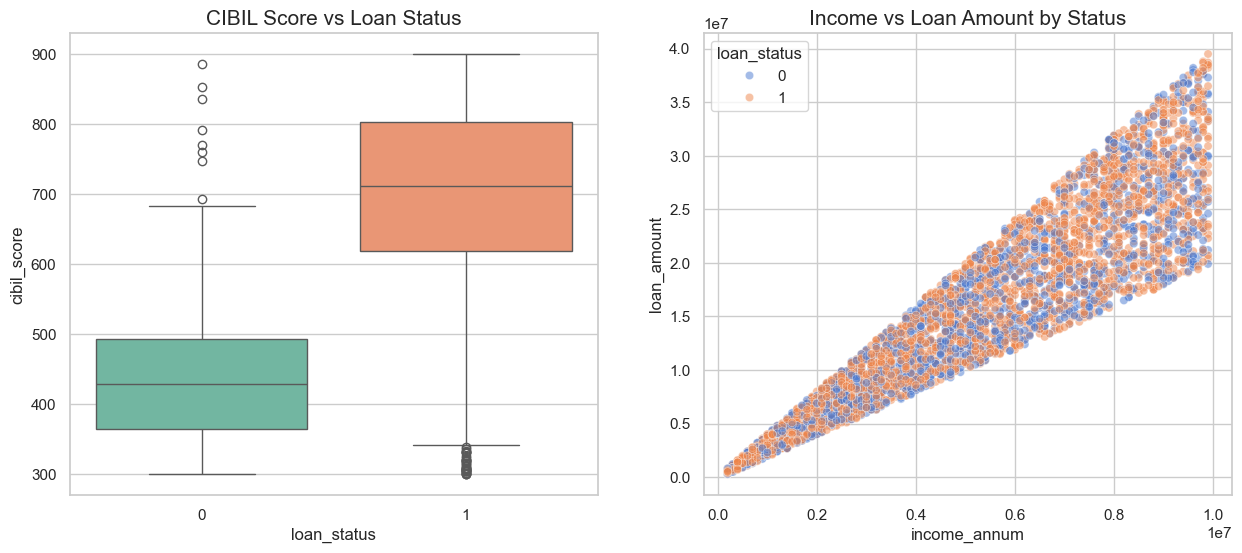

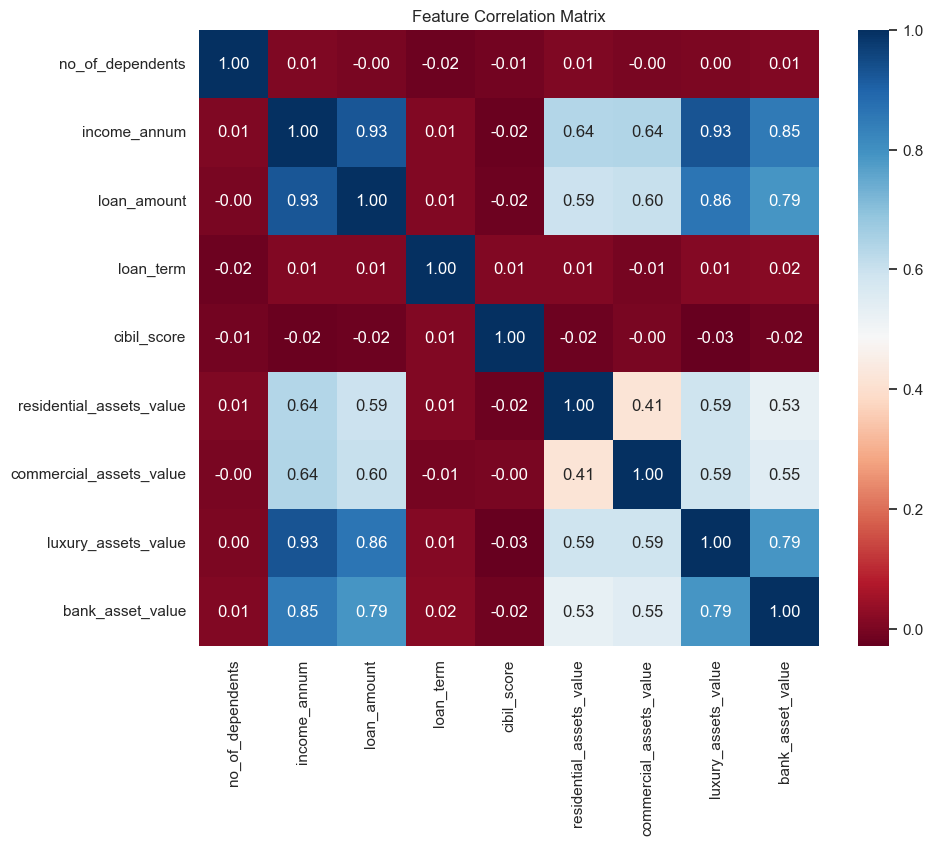

In [246]:
plt.figure(figsize=(15, 6))

# Relationship: CIBIL vs Loan Status
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status', y='cibil_score', data=df, palette='Set2')
plt.title('CIBIL Score vs Loan Status', fontsize=15)

# Relationship: Income vs Loan Amount (Correlated with Status)
plt.subplot(1, 2, 2)
sns.scatterplot(x='income_annum', y='loan_amount', hue='loan_status', data=df, alpha=0.5)
plt.title('Income vs Loan Amount by Status', fontsize=15)

plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='RdBu', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

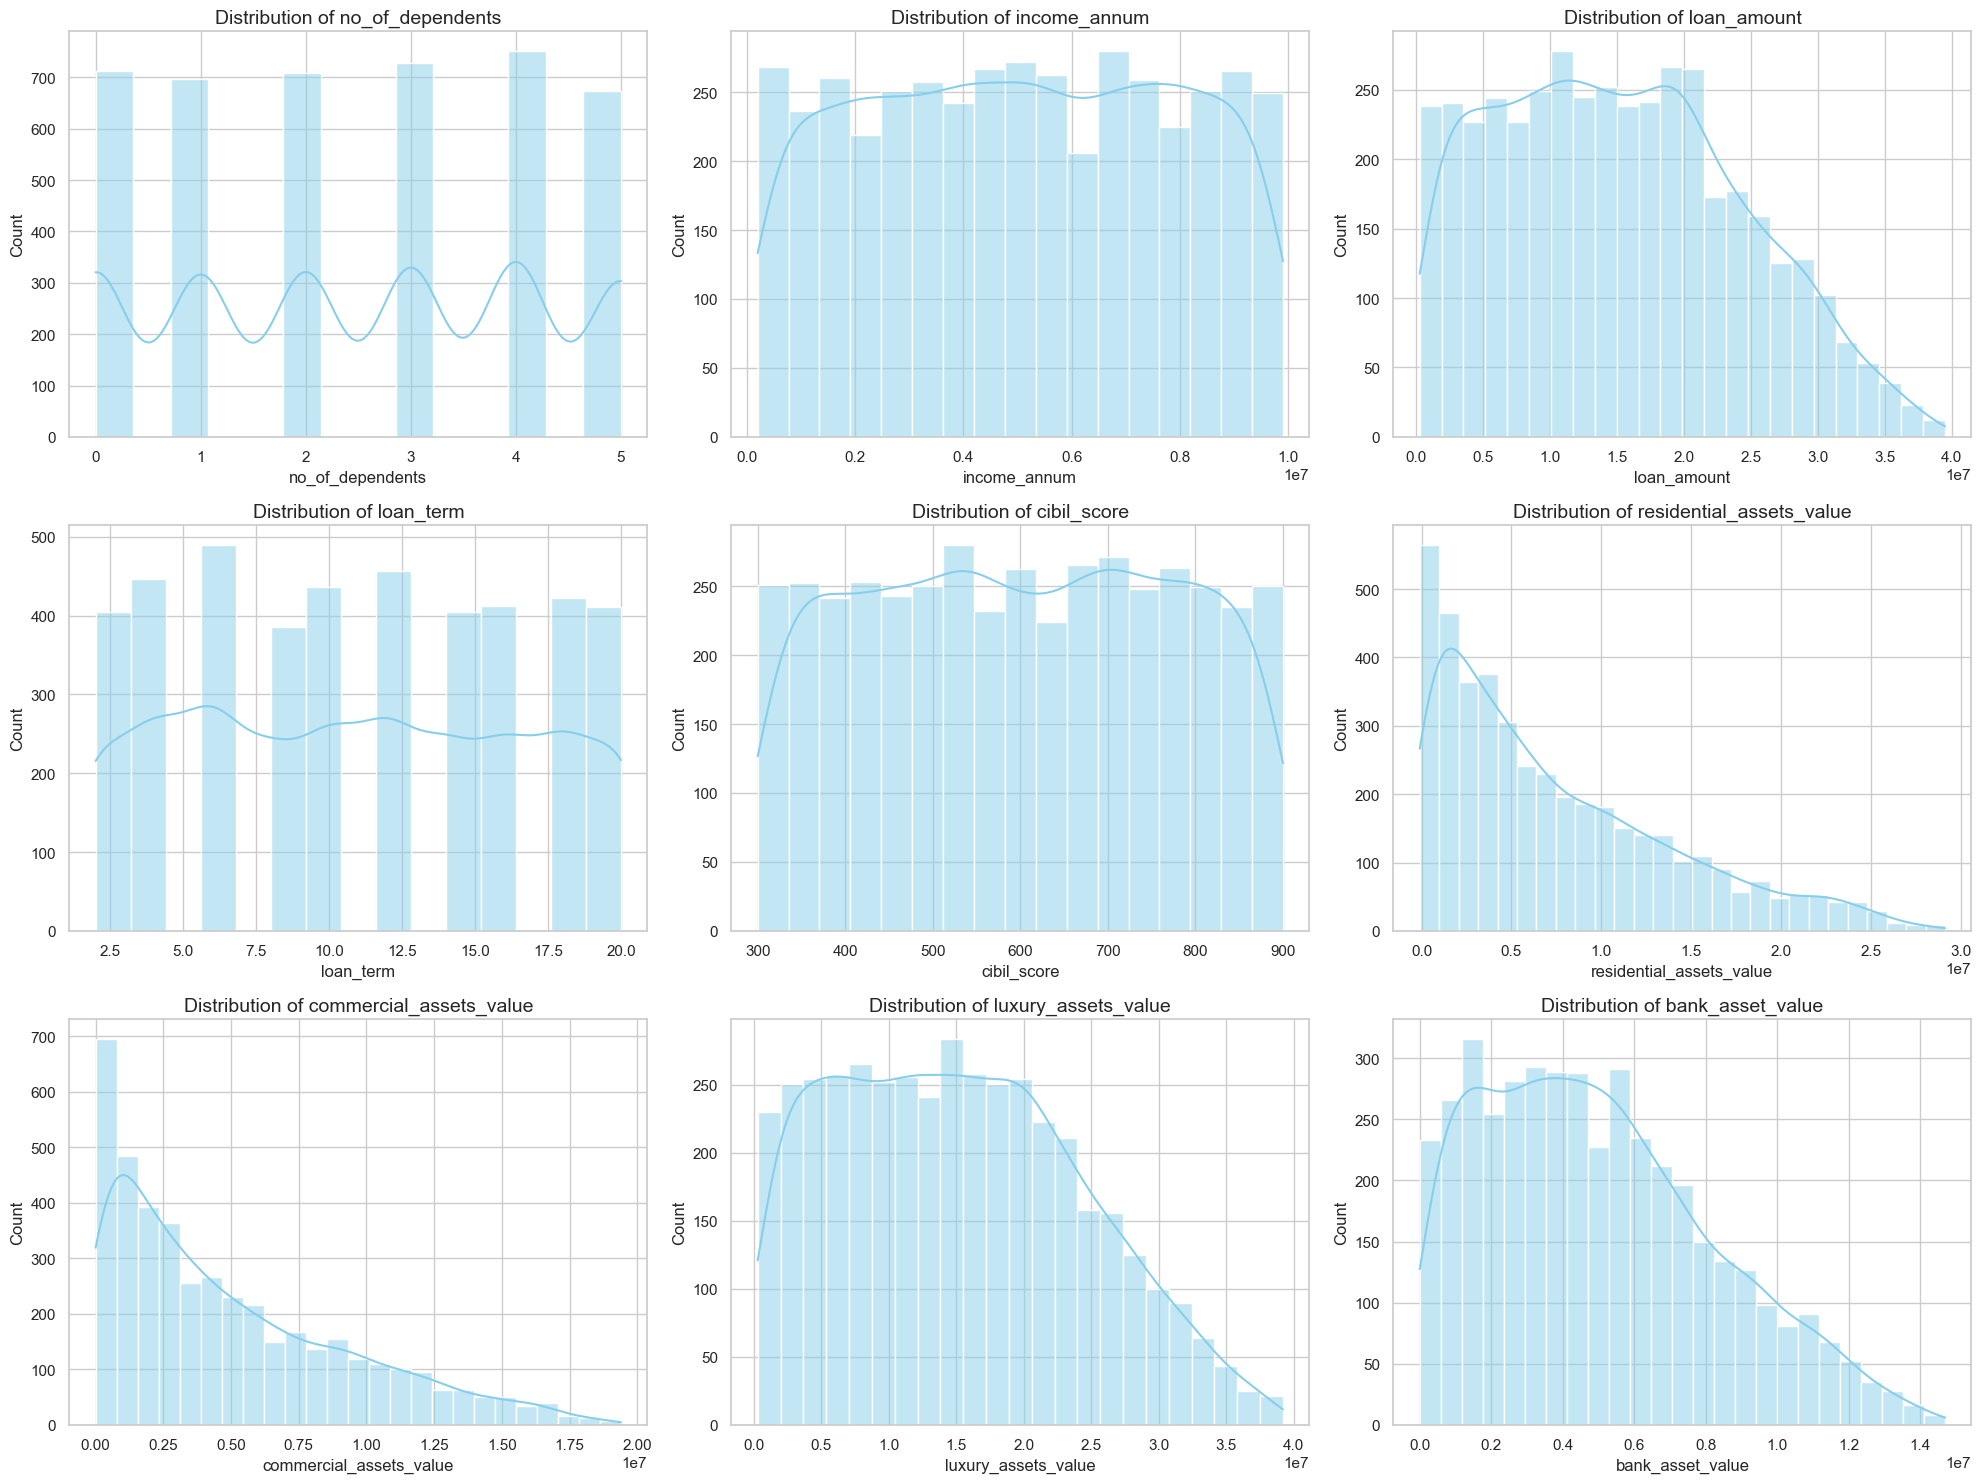

Education Distribution:
 education
Graduate        0.502225
Not Graduate    0.497775
Name: proportion, dtype: float64

Self-Employed Distribution:
 self_employed
Yes    0.503631
No     0.496369
Name: proportion, dtype: float64

Target Class Imbalance (Loan Status):
 loan_status
1    0.62216
0    0.37784
Name: proportion, dtype: float64


In [247]:
# List of numerical columns for analysis
num_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
            'cibil_score', 'residential_assets_value', 'commercial_assets_value',
            'luxury_assets_value', 'bank_asset_value']

# Plotting Numerical Distributions
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=14)

plt.tight_layout()
plt.show()

# Categorical Frequency Analysis
print("Education Distribution:\n", df['education'].value_counts(normalize=True))
print("\nSelf-Employed Distribution:\n", df['self_employed'].value_counts(normalize=True))
print("\nTarget Class Imbalance (Loan Status):\n", df['loan_status'].value_counts(normalize=True))

In [248]:
# Split Data
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify Features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Function to create and return a trained pipeline
def get_model_pipeline(classifier):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

# Initialize Models with Class Weight Balancing
log_reg_model = LogisticRegression(class_weight='balanced', random_state=42)
dec_tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Create Pipelines
log_reg_pipe = get_model_pipeline(log_reg_model)
dec_tree_pipe = get_model_pipeline(dec_tree_model)

# Train Both
log_reg_pipe.fit(X_train, y_train)
dec_tree_pipe.fit(X_train, y_train)

print("Both pipelines (Logistic Regression & Decision Tree) trained with class balancing.")

Both pipelines (Logistic Regression & Decision Tree) trained with class balancing.



--- Logistic Regression Performance ---
              precision    recall  f1-score   support

    Rejected       0.88      0.93      0.90       323
    Approved       0.96      0.92      0.94       531

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.92      0.92       854



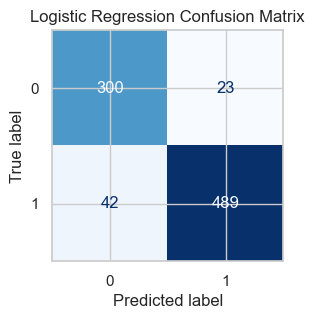


--- Decision Tree Performance ---
              precision    recall  f1-score   support

    Rejected       0.98      0.96      0.97       323
    Approved       0.98      0.99      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



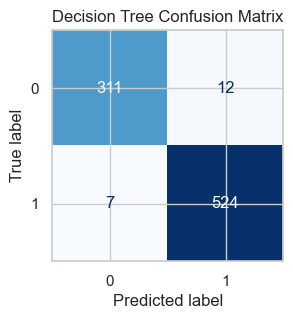

In [249]:
models = {"Logistic Regression": log_reg_pipe, "Decision Tree": dec_tree_pipe}

for name, pipe in models.items():
    y_pred = pipe.predict(X_test)
    print(f"\n--- {name} Performance ---")
    print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))

    # Visualizing the Errors
    fig, ax = plt.subplots(figsize=(4, 3))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=ax, colorbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Loan Approval Analysis: EDA Observations

This document summarizes the Exploratory Data Analysis (EDA) findings categorized into Univariate and Bivariate observations.

---

## 1. Univariate Analysis Observations
*Focusing on the distribution and characteristics of individual variables.*

### **Target Variable: Loan Status**
* **Distribution:** The dataset contains 4,269 records.
* **Class Balance:** Approximately **62.2% (2,656)** of loans are approved, while **37.8% (1,613)** are rejected.
* **Observation:** The target variable is relatively balanced, though there is a majority class of approved loans.

### **Numerical Features**
* **CIBIL Score:** Scores are spread across the 300–900 range. This shows a wide variety of creditworthiness among applicants.
* **Income & Loan Amount:** Both `income_annum` and `loan_amount` show a broad distribution. Most applicants fall within a standard middle-to-high income range.
* **Assets:** Values for residential, commercial, luxury, and bank assets vary significantly, suggesting a diverse socioeconomic background of applicants.
* **Loan Term:** Most loans are distributed across discrete terms (e.g., 2 to 20 years).

### **Categorical Features**
* **Education:** Applicants are divided into "Graduate" and "Not Graduate."
* **Self-Employed:** A mix of salaried and self-employed individuals exists in the dataset.

---

## 2. Bivariate Analysis Observations
*Exploring the relationships between features and the target variable (Loan Status).*

### **Primary Driver: CIBIL Score vs. Loan Status**
* **Observation:** The **CIBIL Score** is the most critical predictor of loan approval.
* **Detail:** Boxplots indicate that approved loans are heavily concentrated among applicants with higher CIBIL scores. Applicants with scores below a certain threshold (typically 550) face a much higher rate of rejection.

### **Financial Correlation: Income vs. Loan Amount**
* **Observation:** There is a strong positive linear correlation between `income_annum` and `loan_amount`.
* **Detail:** As expected, lenders tend to offer higher loan amounts to individuals with higher annual incomes.

### **Asset Influence**
* **Observation:** While asset values (luxury, bank, etc.) correlate with higher income, they serve as secondary support for the loan.
* **Detail:** High asset values can occasionally buffer an application, but they do not guarantee approval if the CIBIL score is poor.

### **Demographics vs. Status**
* **Education:** "Graduates" show a slightly higher frequency of approval compared to "Not Graduates," though the difference is less pronounced than financial metrics.
* **Dependents:** The number of dependents does not show a drastic impact on the approval status compared to credit history.

---

## 3. Data Quality & Preprocessing Notes
* **Missing Values:** None. The dataset is clean.
* **Feature Engineering:** The `loan_id` column was dropped as it carries no predictive weight.
* **Consistency:** Column names were stripped of leading/trailing spaces to prevent errors during analysis.

---

## 4. Summary Conclusion
The most significant finding of this EDA is that **financial credibility (CIBIL Score)** and **repayment capacity (Income vs. Loan Amount)** are the primary determinants of the loan approval process. Demographic factors like education and self-employment status play a secondary role.